<br>

---
<br>

# <center>VEHICLE LOAN PREDICTION</center>

<br>

---
---

## PROBLEM STATEMENT

The dataset is for vehicle loan default prediction where we need to predict the customer who will default for paying the EMI. The data is almost clean and easy to understand.

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution expectes an accurate prediction of the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. 

The following information regarding the loan and loanee are provided in the datasets:

- Loanee Information (Demographic data like date of birth, Identity proof etc.)

- Loan Information (Disbursal details, loan to value ratio etc.)

- Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

Accurately predicting loan default will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.


The dataset can be downloaded from [Kaggle](https://www.kaggle.com/sneharshinde/ltfs-av-data?select=train.csv).

## DATA LOADING AND CLEANING

### Import Libraries

The libraries used for this project were installed as at when needed but gathered when the project was concluded!

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import kaggle
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
from kaggle.api.kaggle_api_extended import KaggleApi

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, recall_score, auc
from sklearn.metrics import confusion_matrix, f1_score, roc_curve
from sklearn.metrics import precision_score, ConfusionMatrixDisplay

pd.set_option("display.max_columns", None)

### Downloading and extracting the data file

In [2]:
# Initializing the Kaggle API
api = KaggleApi()
api.authenticate()

# Downloading the data file
!kaggle datasets download -d sneharshinde/ltfs-av-data

# specifying the zip file name
file_name = 'ltfs-av-data.zip'
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    
    print()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Extraction Completed!')

os.remove('ltfs-av-data.zip') # Deletes the zipped file


  0%|          | 0.00/11.5M [00:00<?, ?B/s]
  9%|8         | 1.00M/11.5M [00:17<03:09, 58.4kB/s]
  9%|8         | 1.00M/11.5M [00:30<03:09, 58.4kB/s]
 17%|#7        | 2.00M/11.5M [01:45<09:20, 17.8kB/s]
 17%|#7        | 2.00M/11.5M [02:00<09:20, 17.8kB/s]
 26%|##6       | 3.00M/11.5M [03:13<10:14, 14.6kB/s]
 26%|##6       | 3.00M/11.5M [03:30<10:14, 14.6kB/s]
 35%|###4      | 4.00M/11.5M [04:39<09:43, 13.5kB/s]
 35%|###4      | 4.00M/11.5M [04:50<09:43, 13.5kB/s]
 43%|####3     | 5.00M/11.5M [06:23<09:28, 12.0kB/s]
 43%|####3     | 5.00M/11.5M [06:40<09:28, 12.0kB/s]
 52%|#####2    | 6.00M/11.5M [08:24<09:04, 10.6kB/s]
 52%|#####2    | 6.00M/11.5M [08:40<09:04, 10.6kB/s]
 61%|######    | 7.00M/11.5M [10:06<07:32, 10.5kB/s]
 61%|######    | 7.00M/11.5M [10:20<07:32, 10.5kB/s]
 69%|######9   | 8.00M/11.5M [11:10<05:11, 11.8kB/s]
 69%|######9   | 8.00M/11.5M [11:30<05:11, 11.8kB/s]
 78%|#######8  | 9.00M/11.5M [13:26<04:20, 10.2kB/s]
 78%|#######8  | 9.00M/11.5M [13:40<04:20, 10.2kB/s]
 


File Name                                             Modified             Size
test_bqCt9Pv.csv                               2019-10-22 06:31:24     19868455
train.csv                                      2019-10-22 06:31:26     41832101

Extracting all the files now...
Extraction Completed!


### Loading and exploring the dataset

In [6]:
# Reading the dataframe into memory
loan_df = pd.read_csv('train.csv', index_col='UniqueID')

# Changing columns names
new_columns_names = {
    'Current_pincode_ID': 'current_pincode_id',
    'Date.of.Birth': 'date_of_birth' ,
    'Employment.Type': 'employment_type',
    'DisbursalDate': 'disbursal_date',
    'State_ID': 'state_id',
    'Employee_code_ID': 'employee_code_id',
    'MobileNo_Avl_Flag': 'mobile_no_avl_flag',
    'Aadhar_flag': 'aadhar_flag',
    'PAN_flag': 'pan_flag',
    'VoterID_flag': 'voter_id_flag',
    'Driving_flag': 'driving_flag',
    'Passport_flag': 'passport_flag',
    'PERFORM_CNS.SCORE': 'perform_cns_score',
    'PERFORM_CNS.SCORE.DESCRIPTION': 'perform_cns_score_description',
    'PRI.NO.OF.ACCTS': 'pri_no_of_accts',
    'PRI.ACTIVE.ACCTS': 'pri_active_accts',
    'PRI.OVERDUE.ACCTS': 'pri_overdue_accts',
    'PRI.CURRENT.BALANCE': 'pri_current_balance',
    'PRI.SANCTIONED.AMOUNT': 'pri_sanctioned_amount',
    'PRI.DISBURSED.AMOUNT': 'pri_disbursed_amount',
    'SEC.NO.OF.ACCTS': 'sec_no_of_accts',
    'SEC.ACTIVE.ACCTS': 'sec_active_accts',
    'SEC.OVERDUE.ACCTS': 'sec_overdue_accts',
    'SEC.CURRENT.BALANCE': 'sec_current_balance',
    'SEC.SANCTIONED.AMOUNT': 'sec_sanctioned_amount',
    'SEC.DISBURSED.AMOUNT': 'sec_disbursed_amount',
    'PRIMARY.INSTAL.AMT': 'primary_instal_amt',
    'SEC.INSTAL.AMT': 'sec_instal_amt',
    'NEW.ACCTS.IN.LAST.SIX.MONTHS': 'new_accts_in_last_six_months',
    'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS': 'delinquent_accts_in_last_six_months',
    'AVERAGE.ACCT.AGE': 'average_acct_age',
    'CREDIT.HISTORY.LENGTH': 'credit_history_length',
    'NO.OF_INQUIRIES': 'no_of_inquiries'
}

loan_df.rename(columns=new_columns_names, inplace=True)
loan_df.index.name = 'unique_id'

# Let's get an idea about all the features available in dataset
print(loan_df.info())
print()

#view the first 5 rows
loan_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  int64  
 4   supplier_id                          233154 non-null  int64  
 5   manufacturer_id                      233154 non-null  int64  
 6   current_pincode_id                   233154 non-null  int64  
 7   date_of_birth                        233154 non-null  object 
 8   employment_type                      225493 non-null  object 
 9   disbursal_date                       233154 non-null  object 
 10  state_id                             233154 non-null  int64  
 11  employee

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,disbursal_date,state_id,employee_code_id,mobile_no_avl_flag,aadhar_flag,pan_flag,voter_id_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [7]:
# Inspect the mean and standard deviation to see the scale of each features
loan_df.describe()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,mobile_no_avl_flag,aadhar_flag,pan_flag,voter_id_flag,driving_flag,passport_flag,perform_cns_score,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [8]:
# Now check if there is null value in the data!
loan_df.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
current_pincode_id                        0
date_of_birth                             0
employment_type                        7661
disbursal_date                            0
state_id                                  0
employee_code_id                          0
mobile_no_avl_flag                        0
aadhar_flag                               0
pan_flag                                  0
voter_id_flag                             0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                          0
pri_overdue_accts               

### Issues discovered with the dataset.

There are noticeable issues with the dataset, some of which are:

- Wrong datatype for `date_of_birth` and `disbursal_date`.
- Applicant's `age` at the time of disbursal and `disbursal_month` not defined.
- The dataset contains missing values.
- `average_acct_age` and `credit_history_length` have wrong datatypes.
- `mobile_no_avl_flag` column comtains one category of data.
- `employment_type` has some missing values.

All of these columns (features) must be cleaned!

### Cleaning the dataset

In [9]:
# CONVERTING `date_of_birth` AND `disbursal_date` TO DATETIME
# Converting to datetime
loan_df['date_of_birth'] = pd.to_datetime(
                                loan_df['date_of_birth'], 
                                infer_datetime_format=True
                            )

loan_df['disbursal_date'] = pd.to_datetime(
                                loan_df['disbursal_date'],
                                infer_datetime_format=True
                            )
# Creates `age` columns from disbursal date
loan_df['age'] = loan_df['disbursal_date'] - loan_df['date_of_birth']
loan_df['age'] = abs(loan_df['age'] // np.timedelta64(1, 'Y'))


# CREATE `disbursal_month` COLUMN
loan_df['disbursal_month'] = loan_df['disbursal_date'].dt.month


# FIXINGSTRING COLUMNS
# Converting `average_acct_age`
def calc_months(str_list):
    """Calculates the months of average_acct_age.

        Parameters
        ----------
        str_list: The str column.
               
        Returns
        --------
        num_months: The number of months from the average_acct_age
    """
    years = int(str_list[0])
    months = int(str_list[1])

    num_months = (years * 12) + months
    return num_months

# Extracts the relevant numbers from the string
loan_df[
    'average_aact_age_months'
] = loan_df['average_acct_age'].str.findall('\d+')

# Usesmap to perform calc_months across all rows
loan_df[
    'average_aact_age_months'
] = loan_df['average_aact_age_months'].map(calc_months)


# Converts `credit_history_length`
def convert_str_to_months(col_name):
    """converting str year values to months.

        Parameters
        ----------
        col_name: The str column name.
               
        Returns
        --------
        num_months: The number of months from credit_history_length
    """
    new_col = col_name + '_months'
    loan_df[new_col] = loan_df[col_name].str.findall('\d+')
    loan_df[new_col] = loan_df[new_col].map(calc_months)
    
convert_str_to_months('credit_history_length')


# Drops irrelevant columns
drop_cols = [
    'disbursal_date', 'date_of_birth', 'average_acct_age', 
    'credit_history_length', 'branch_id', 'supplier_id', 'supplier_id',
    'current_pincode_id', 'employee_code_id', 'pan_flag', 'voter_id_flag',
    'driving_flag', 'passport_flag', 'mobile_no_avl_flag',
    'perform_cns_score_description'
]

loan_df = loan_df.drop(drop_cols, axis=1)


# Dealing with the `employment_type` variable
loan_df.dropna(inplace = True),
loan_df['employment_type'].replace(
    {'Salaried': 0, 'Self employed': 1}, inplace=True)

In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225493 entries, 420825 to 630213
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     225493 non-null  int64  
 1   asset_cost                           225493 non-null  int64  
 2   ltv                                  225493 non-null  float64
 3   manufacturer_id                      225493 non-null  int64  
 4   employment_type                      225493 non-null  int64  
 5   state_id                             225493 non-null  int64  
 6   aadhar_flag                          225493 non-null  int64  
 7   perform_cns_score                    225493 non-null  int64  
 8   pri_no_of_accts                      225493 non-null  int64  
 9   pri_active_accts                     225493 non-null  int64  
 10  pri_overdue_accts                    225493 non-null  int64  
 11  pri_curr

All columns have been cleaned and prepared for exploration.

---

## EXPLORATORY DATA ANALYSIS (EDA)

### Exploring some categorical and continuous variables

##### Exploring categorical variables

In [11]:
# A function for exploring categorical variables
def explore_categorical_variables(col_name):
    """This function print summaries of a column and shows a catplot 
    of the columns
    
    Parameter
    ---------
    col_name: The name of the categorical column 
    
    
    prints
    ------
    prints the `summary`, `counts`,  and `unstacked groupby`
    
    
    Plot
    ----
    The count plot of the column, with the `target variable and the hue    
    """
    # Prints the summary title
    print("{0} summary".format(col_name))
    print("\n")

    # Prints the value count
    print("{0} counts".format(col_name))
    print(loan_df[col_name].value_counts())
    print("\n")

    # Prints the columns grouped by the dataset
    print("{0} default counts".format(col_name))
    print(
        loan_df.groupby(
            col_name
        )['loan_default'].value_counts().unstack(level=-1)
    )
    print("\n")
    
    # Shows the catplot of the column
    sb.catplot(
        data=loan_df, kind='count',
        x=col_name, hue='loan_default')
    plt.show()

manufacturer_id summary


manufacturer_id counts
86     106062
45      55207
51      26243
48      15721
49       9700
120      9417
67       2366
145       760
153        11
152         5
156         1
Name: manufacturer_id, dtype: int64


manufacturer_id default counts
loan_default           0        1
manufacturer_id                  
45               42562.0  12645.0
48               11428.0   4293.0
49                7566.0   2134.0
51               20780.0   5463.0
67                1849.0    517.0
86               84382.0  21680.0
120               7338.0   2079.0
145                608.0    152.0
152                  5.0      NaN
153                  7.0      4.0
156                  1.0      NaN




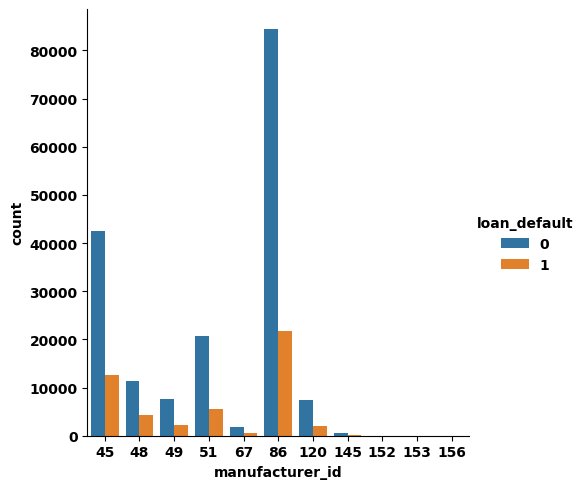

In [12]:
# Exploring the `manufacturer_id` Column
explore_categorical_variables('manufacturer_id')

The chart above shows that the manufacturer with `id` __86__ has the highest loan_default rate followed by the manufacturer with `id` __45__ and __51__, respectively.

disbursal_month summary


disbursal_month counts
10    81874
8     55256
9     52630
11     6477
6      5802
12     5426
3      4987
4      4474
7      4051
5      2818
1      1673
2        25
Name: disbursal_month, dtype: int64


disbursal_month default counts
loan_default         0      1
disbursal_month              
1                 1292    381
2                   23      2
3                 3965   1022
4                 3510    964
5                 2221    597
6                 4546   1256
7                 3141    910
8                43579  11677
9                42436  10194
10               62196  19678
11                5287   1190
12                4330   1096




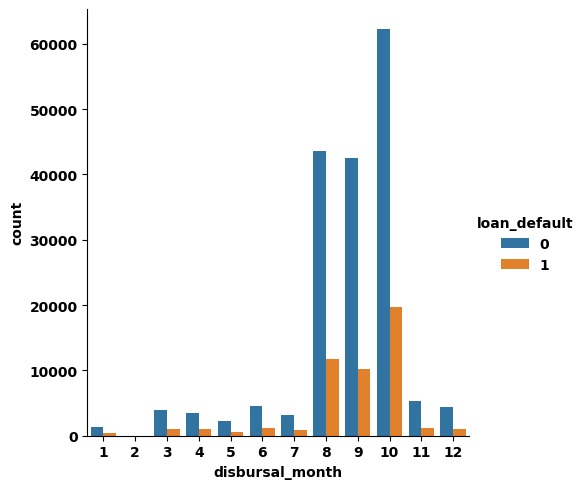

In [13]:
# Exploring the `disbursal_month` Column
explore_categorical_variables('disbursal_month')

Also, the month with the highest loan disburse and default is __October__, followed by __August__ and __September__ respectively.

As observed, the dataset contains several columns with the underscore **_flag**

- `aadhar_flag`: Flagged as 1 if aadhar was shared by the customer.
- `pan_flag`: Flagged as 1 if pan was shared by the customer.
- `voter_id_flag`: Flagged as 1 if voter id was shared by the customer.
- `driving_flag`: Flagged as 1 if DL was shared by the customer.
- `passport_flag`: Flagged as 1 if passport was shared by the customer.

These are binary or boolean fields where a 1 means that some piece of personal information was provided by the customer and 0 means it was not. 

Essentially, these columns can be considered as categoricals so we can use our `explore_categorical_variables` function to look at one of them!

Let's have a look at 'aadhar_flag'. An AADHAR number is a 12 digit personal id number provided to residents of India by the government

aadhar_flag summary


aadhar_flag counts
1    188900
0     36593
Name: aadhar_flag, dtype: int64


aadhar_flag default counts
loan_default       0      1
aadhar_flag                
0              27157   9436
1             149369  39531




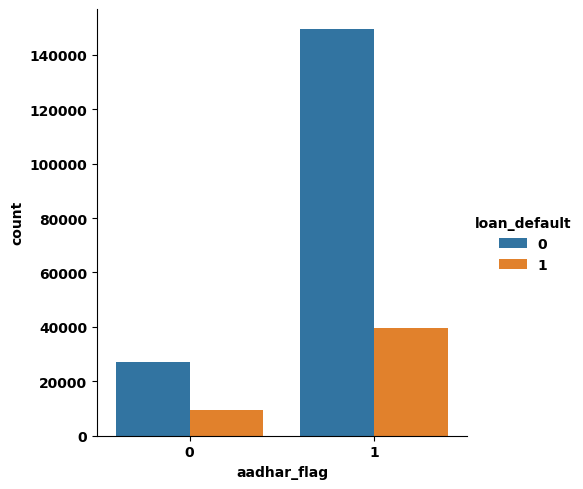

In [14]:
# Exploring Binary Variables
explore_categorical_variables('aadhar_flag')

Looks like people who didn't provide their AADHAR number defaulted more frequently at 25.6%!

##### Exploring continuous variables

In [15]:
# A Defined Function for Exploring Continuous Variables
def explore_continuous_variables(col_name):
    """This function print summaries of a column and shows a boxplot 
    of the columns
    
    Parameter
    ---------
    col_name: The name of the categorical column 
    
    
    prints
    ------
    prints the `summary`, `counts`, `ratio`, `default ratio` and 
    unstacked groupby
    
    
    Plot
    ----
    The boxplot of the column against the `target variable`.
    """
    #print statistical summary
    print("{0} summary".format(col_name))
    print("\n")
    print(loan_df[col_name].describe())
    print("\n")

    # Look at boxplot
    sb.boxplot(x=col_name, data=loan_df)
    plt.show()

    # Look at the distribution
    sb.displot(
        loan_df[col_name], 
        kind='kde'
    )
    
    plt.show();

    # Now lets look deeper by grouping with the target variable 
    print("{0} grouped summary".format(col_name))
    print("\n")
    print(loan_df.groupby('loan_default')[col_name].describe())

    #look at grouped boxplot
    sb.boxplot(x=col_name, y='loan_default', data=loan_df, orient="h")
    plt.show();

age summary


count    225493.000000
mean         33.785372
std           8.887568
min          20.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          54.000000
Name: age, dtype: float64




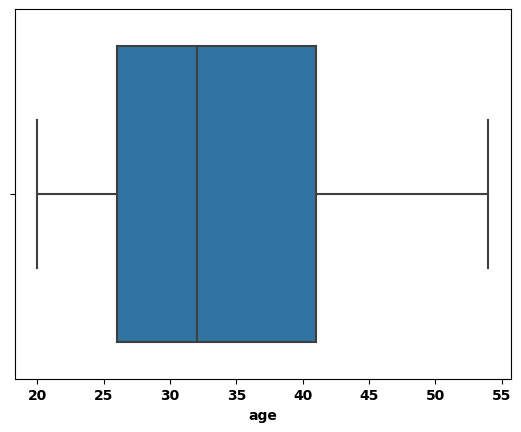

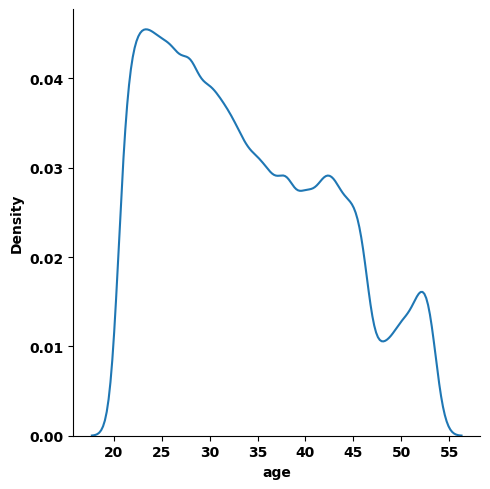

age grouped summary


                 count       mean       std   min   25%   50%   75%   max
loan_default                                                             
0             176526.0  33.943668  8.884552  20.0  26.0  33.0  41.0  54.0
1              48967.0  33.214716  8.875118  20.0  26.0  32.0  40.0  54.0


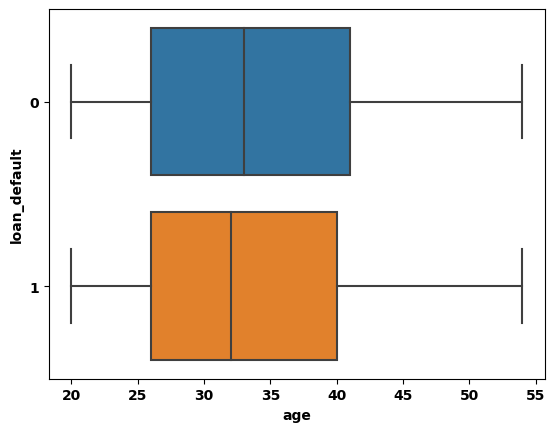

In [16]:
# Exploring the `age` Column
explore_continuous_variables('age')

The plot above shows that the`age` column has a lot of negative values. A closer llok at the data in a spreadsheet shows that the date of birth column has some data ranges that are outrageous.

disbursed_amount summary


count    225493.00000
mean      54240.72883
std       12775.59006
min       13320.00000
25%       47049.00000
50%       53703.00000
75%       60213.00000
max      987354.00000
Name: disbursed_amount, dtype: float64




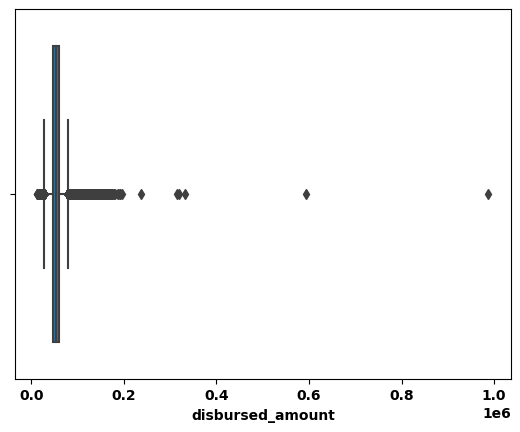

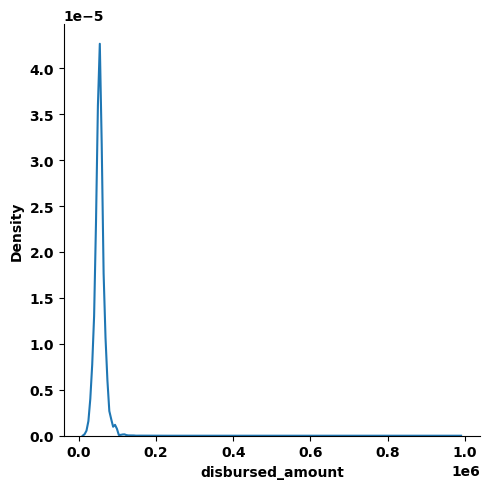

disbursed_amount grouped summary


                 count          mean           std      min      25%      50%  \
loan_default                                                                    
0             176526.0  53707.242282  12906.119631  13320.0  46349.0  53278.0   
1              48967.0  56163.947454  12099.967718  13369.0  49303.0  55359.0   

                  75%       max  
loan_default                     
0             59847.0  987354.0  
1             61923.0  191392.0  


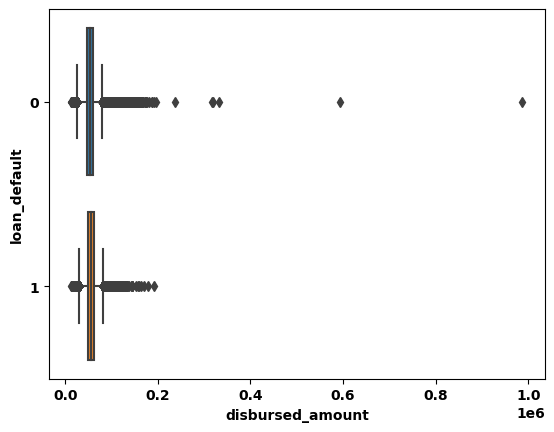

In [17]:
# Exploring the `disbursed_amount` Column
explore_continuous_variables('disbursed_amount')

Generally, the disbursed amount for defaulted loans was larger, or at least the distribution ranges over larger values

There are some huge outliers here, which will be dealt with next. It is notice that the largest value here is 990,572 which is considerably larger than the next largest value which is also an extreme outlier.

Is it possible that this could be an error in the data?
- If we assume that the disbursal amount is stored in Indian rupees then 990,572 equates to ~ £10,000 or $13,400
- Indeed a lot of money but not impossible for a car loan 

I'll check the row data, `ltv` and `asset_cost` should give an idea about whether or not this is a valid piece of data.

 

In [18]:
# Finding the index number of the row with the maximum value
print(loan_df['disbursed_amount'].idxmax())

# Selecting the `disbursed_amount` and `asset_cost` by the index number
loan_df.loc[loan_df['disbursed_amount'].idxmax()][[0,1]]

629503


disbursed_amount     987354.0
asset_cost          1328954.0
Name: 629503, dtype: float64

Ok, it seems reasonable that the applicant borrowed __990,572__ to pay for a car that cost __1,628,992__. This is assumed to be a legitimate value that can pass in the model.

### Exploring the Target Feature

Distribution of the loan_default in the dataset
0    0.782845
1    0.217155
Name: loan_default, dtype: float64


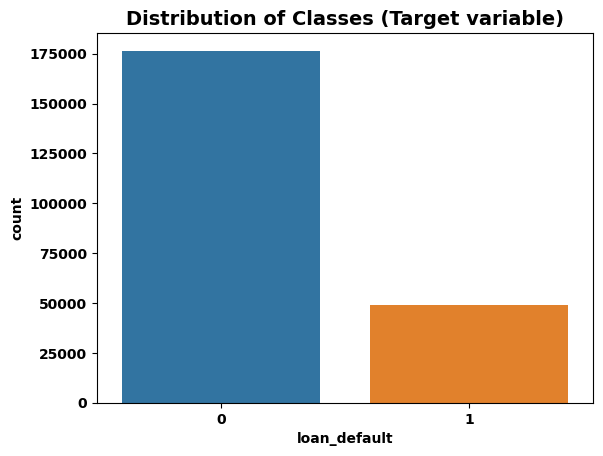

In [19]:
# Normalized value count of loan default
print('Distribution of the loan_default in the dataset')
print(loan_df['loan_default'].value_counts(normalize=True))

# Visualizing the Target Columns
sb.countplot(x='loan_default', data=loan_df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

Out of the **233,154** test loans, there are **50,611** defaults and **182,543** Non-default, which constitutes __~ 22%__ and __~ 78%__ respectively. Here we clearly see the imbalance between two classes. We need to resolve class imbalance by oversampling class 1.

In [20]:
# Over sampling to resolve imbalance
loan_df = loan_df.sample(frac=1)
loan_default_1 = loan_df.loc[loan_df['loan_default'] == 1]
loan_default_0 = loan_df.loc[loan_df['loan_default'] == 0]

normal_distributed_df = pd.concat([loan_default_1, loan_default_1, loan_default_1, loan_default_0])

# Shuffle dataframe rows
loan_df = normal_distributed_df.sample(frac=1, random_state=42)
loan_df.head()

,disbursed_amount,asset_cost,ltv,manufacturer_id,employment_type,state_id,aadhar_flag,perform_cns_score,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default,age,disbursal_month,average_aact_age_months,credit_history_length_months
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544094,78986,95714,84.94,86,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,9,0,0
479306,68069,91230,76.62,86,1,3,1,653,1,1,0,41262,60000,60000,0,0,0,0,0,0,0,0,1,0,0,0,42,8,4,4
422120,60947,72398,87.02,86,0,8,1,659,5,4,0,2541084,2831704,2831704,0,0,0,0,0,0,174450,0,2,0,0,1,32,4,26,60
510373,86906,118396,74.99,48,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27,9,0,0
558636,45349,60267,76.33,45,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,5,0,0


Distribution of the loan_default in the dataset
0    0.545799
1    0.454201
Name: loan_default, dtype: float64


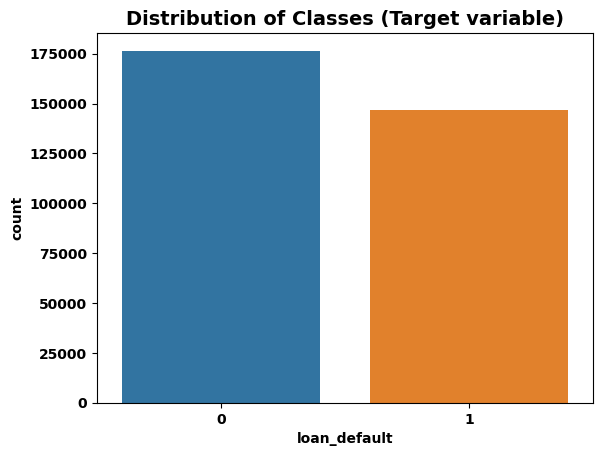

In [21]:
# Normalized value count of loan default
print('Distribution of the loan_default in the dataset')
print(loan_df['loan_default'].value_counts(normalize=True))

# Visualizing the Target Columns
sb.countplot(x='loan_default', data=loan_df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

---

## FEATURE ENGINEERING

### Combining Features

I'll create new columns from existing ones to make the dataset ready for training the model. The loan data contains 14 columns providing information about any existing loans a customer may have. This data is split according to primary and secondary accounts, a primary account is a loan where the customer is the sole recipient of the disbursal, 
a secondary account is one where the customer is a co-applicant or guarantor for the loan.

Instead of simply dropping these columns, I'll combine them so as to reduce the complexity of the data without losing information. For example, we can create a column `total_accts` to store the combined total of primary and secondary accounts.


In [22]:
# Combining primary and secondary accounts
loan_df['total_accts'] = (
    loan_df['pri_no_of_accts'] + loan_df['sec_no_of_accts'])
loan_df['total_active_accts'] = (
    loan_df['pri_active_accts'] + loan_df['sec_active_accts'])
loan_df['total_overdue_accts'] = (
    loan_df['pri_overdue_accts'] + loan_df['sec_overdue_accts'])
loan_df['total_current_balance'] = (
    loan_df['pri_current_balance'] + loan_df['sec_current_balance'])
loan_df['total_sanctioned_amount'] = (
    loan_df['pri_sanctioned_amount'] + loan_df['sec_sanctioned_amount'])
loan_df['total_disbursed_amount'] = (
    loan_df['pri_disbursed_amount'] + loan_df['sec_disbursed_amount'])
loan_df['total_instal_amt'] = (
    loan_df['primary_instal_amt'] + loan_df['sec_instal_amt'])

# Defining the columns to drop
drop_cols = [
    'pri_no_of_accts', 'sec_no_of_accts', 'pri_active_accts', 
    'sec_active_accts', 'pri_overdue_accts', 'sec_overdue_accts',
    'pri_current_balance', 'sec_current_balance', 'pri_sanctioned_amount', 
    'sec_sanctioned_amount', 'pri_disbursed_amount', 'sec_disbursed_amount',
    'primary_instal_amt', 'sec_instal_amt']

# Dropping the duplicate columns
loan_df = loan_df.drop(drop_cols, axis=1)

In [23]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323427 entries, 544094 to 431461
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     323427 non-null  int64  
 1   asset_cost                           323427 non-null  int64  
 2   ltv                                  323427 non-null  float64
 3   manufacturer_id                      323427 non-null  int64  
 4   employment_type                      323427 non-null  int64  
 5   state_id                             323427 non-null  int64  
 6   aadhar_flag                          323427 non-null  int64  
 7   perform_cns_score                    323427 non-null  int64  
 8   new_accts_in_last_six_months         323427 non-null  int64  
 9   delinquent_accts_in_last_six_months  323427 non-null  int64  
 10  no_of_inquiries                      323427 non-null  int64  
 11  loan_def

---

## APPLYING MACHINE LEARNING MODELS

### Define a function for encoding and splitting

In [24]:
def encode_and_split(data):
    """Encodes and Split the dataset to X and y train and test variables.

        Parameters
        ----------
        data : The dataframe to be encoded and split.
                    
            
        Returns
        -------
        Encoded dataset:  The encoder employed is One Hot Encoder
        Define X and y:   The X value is all the dataframe except the 
                          target variable, and the y columns is the 
                          target variable.
        train_test_split: Splits dataset into X_train, y_train, 
                          X_test, y_test
        
        
        Prints
        --------
        All print function assertains the correct functioning.
    """
        
    """Defining X and y columns"""        
    # Splitting the datset
    X = loan_df.drop(['loan_default'], axis=1)
    y = loan_df['loan_default']

    """Train-Test Split"""
    # Defining X_train, y_train, X_tes, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=42
                                                       )

    # Scaling training and testing data
    r_scaler = StandardScaler()  
    X_train = r_scaler.fit_transform(X_train)
    X_test = r_scaler.transform(X_test)
    
    
    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = encode_and_split(loan_df)

The datset has now been transformed and splitted into training and test sets in a ratio __80%__  : __20%__ for `Training` and `Testing`, respectively.

## BUILD AND EVALUATE MODELS

Define evaluation function which calculates following metrics:

- Confusion matrix
- ROC chart
- Accuracy score
- Precision
- Recall
- F1 score
- AUC score.

In [26]:
# defining the evaluation model
def evaluate_model(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("\n")
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("f1 score: ", f1_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)
    print("\n")
    
    # plot the ROC curve 
    plt.figure()
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### 1. Logistic Regression

Confusion Matrix: 
 [[25376 10012]
 [16070 13228]]


Accuracy:  0.5967906502179761
Precision:  0.5691910499139414
Recall:  0.4514983957949348
f1 score:  0.5035593284860481
AUC:  0.6311257523676579




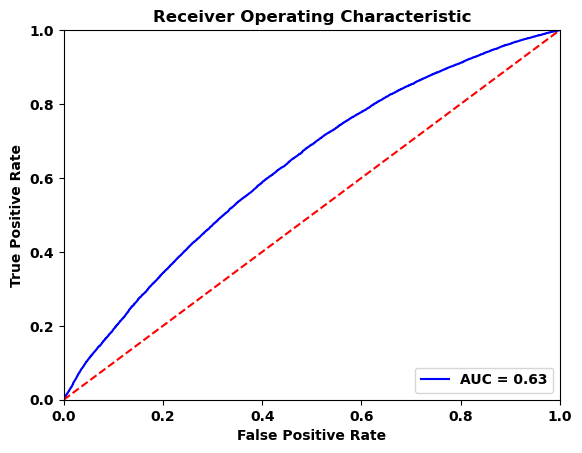

In [27]:
# Instantiating the model
lr_grid = LogisticRegression()

# fitting the model
lr_grid.fit(X_train, y_train)

# evaluating the model
evaluate_model(lr_grid, X_test, y_test)

---

### 2. Decision Trees

Confusion Matrix: 
 [[26530  8858]
 [  869 28429]]


Accuracy:  0.8496274309742449
Precision:  0.7624373105908225
Recall:  0.9703392723052768
f1 score:  0.8539160471577683
AUC:  0.8602335102380597




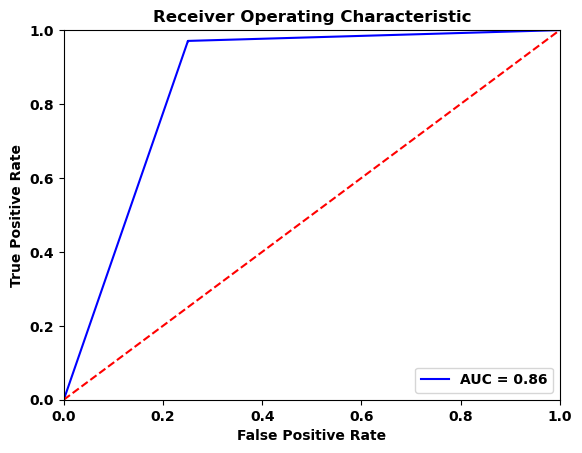

In [28]:
# Instantiating the model
dt_clf = DecisionTreeClassifier()

# fitting the model
dt_clf.fit(X_train, y_train)

# evaluating the model
evaluate_model(dt_clf, X_test, y_test)

---

### 3. Random Forest Classifier

Confusion Matrix: 
 [[31956  3432]
 [  997 28301]]


Accuracy:  0.9315307794576879
Precision:  0.8918476034412126
Recall:  0.9659703734043279
f1 score:  0.927430322295227
AUC:  0.9819264612820912




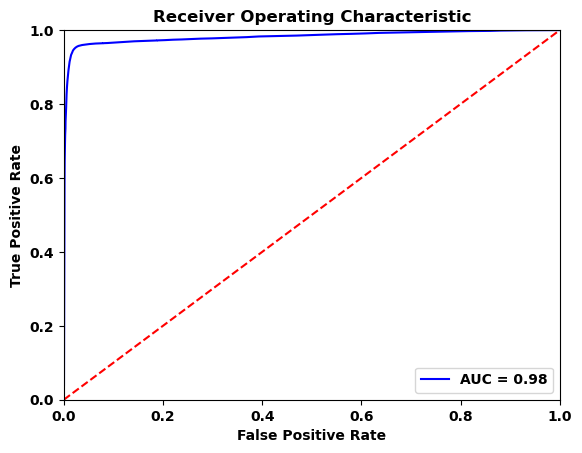

In [29]:
# Instantiating the model
rf_clf = RandomForestClassifier()

# fitting the model
rf_clf.fit(X_train, y_train)

# evaluating the model
evaluate_model(rf_clf, X_test, y_test)

---

### 4. SGD Classifier

Confusion Matrix: 
 [[24461 10927]
 [15913 13385]]


Accuracy:  0.5850725040967134
Precision:  0.5505511681474169
Recall:  0.4568571233531299
f1 score:  0.49934713672822234
AUC:  0.6140823283753976




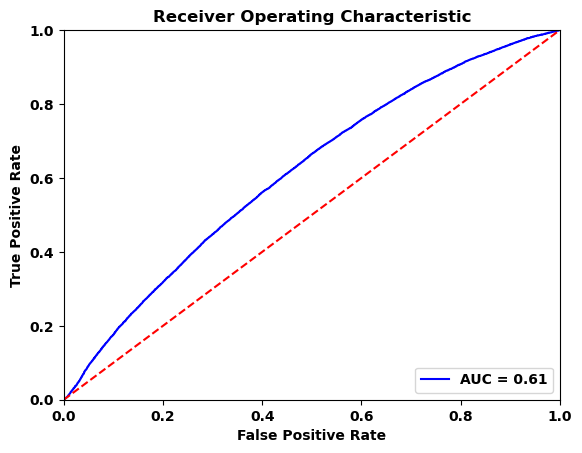

In [30]:
# Instantiating the model
sgdc = SGDClassifier(loss='modified_huber')

# fitting the model
sgdc.fit(X_train, y_train)

# evaluating the model
evaluate_model(sgdc, X_test, y_test)

---

### 5. XGB Classifier

Confusion Matrix: 
 [[26399  8989]
 [ 9531 19767]]


Accuracy:  0.7136938441084624
Precision:  0.6874043677841146
Recall:  0.6746876919926275
f1 score:  0.6809866675853515
AUC:  0.7909581233762549




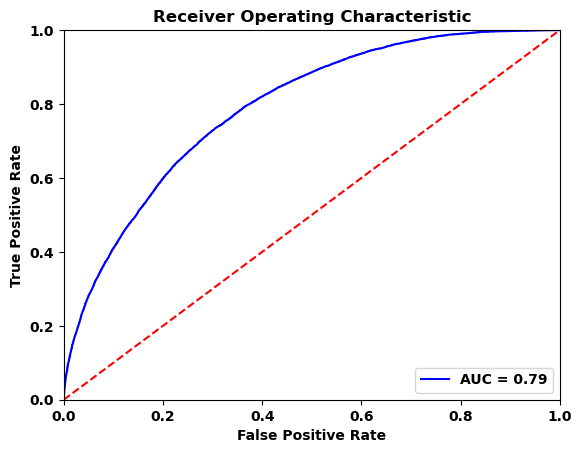

In [31]:
# Instantiating the model
XGBC = XGBClassifier(gamma=0.2,learning_rate=0.2, max_depth=9,
                     n_estimators=192, reg_alpha=0.1)

# fitting the model
XGBC.fit(X_train, y_train)

# evaluating the model
evaluate_model(XGBC, X_test, y_test)

### 6. AdaBoostClassifier

Confusion Matrix: 
 [[25033 10355]
 [15121 14177]]


Accuracy:  0.6061589833967165
Precision:  0.5778982553399641
Recall:  0.48388968530275106
f1 score:  0.5267323054059075
AUC:  0.6451738097347337




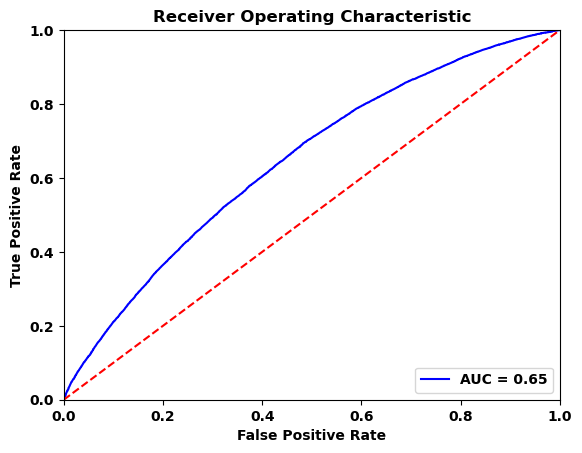

In [32]:
# Instantiating the model
ABC = AdaBoostClassifier()

# fitting the model
ABC.fit(X_train, y_train)

# evaluating the model
evaluate_model(ABC, X_test, y_test)

### 7. GradientBoostingClassifier

Confusion Matrix: 
 [[24523 10865]
 [14084 15214]]


Accuracy:  0.6143060322171722
Precision:  0.5833812646190422
Recall:  0.5192845928049696
f1 score:  0.5494699965689728
AUC:  0.6572269787531844




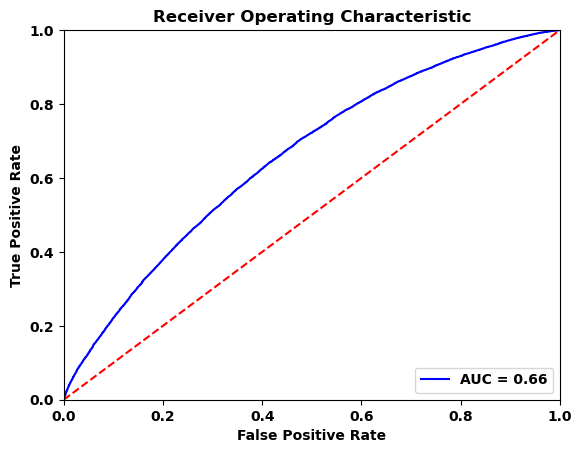

In [33]:
# Instantiating the model
GBC = GradientBoostingClassifier()

# fitting the model
GBC.fit(X_train, y_train)

# evaluating the model
evaluate_model(GBC, X_test, y_test)

### 8. LGBMClassifier

Confusion Matrix: 
 [[25629  9759]
 [10603 18695]]


Accuracy:  0.6852178214760536
Precision:  0.657025374288325
Recall:  0.6380981636971806
f1 score:  0.6474234658539963
AUC:  0.7581411427887299




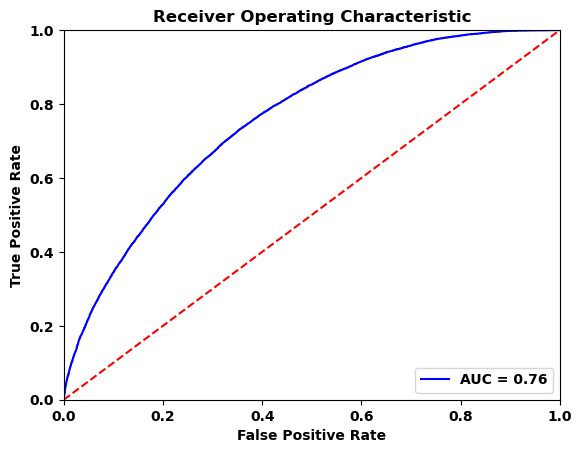

In [34]:
# Instantiating the model
LGBM = LGBMClassifier(
    boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
    importance_type='gain', learning_rate=0.3, max_depth=12,
    min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
    n_estimators=540, n_jobs=-1, num_leaves=31, objective=None,
    random_state=300, reg_alpha=0.0, reg_lambda=0.0, silent=True,
    subsample=1.0, subsample_for_bin=200000, subsample_freq=0
)

# Fitting the model
LGBM.fit(X_train, y_train)

# evaluating the model
evaluate_model(LGBM, X_test, y_test)

---

### 9. Model Stacking

Confusion Matrix: 
 [[34073  1315]
 [ 1146 28152]]


Accuracy:  0.9619546733450824
Precision:  0.9553738079885974
Recall:  0.9608847020274421
f1 score:  0.9581213307240704
AUC:  0.9815931575668811




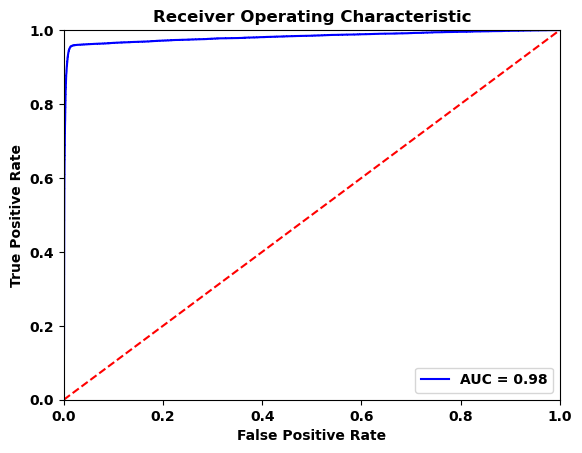

In [35]:
# Defining the estimators 
estimators = [
    ('dt_clf', DecisionTreeClassifier()),
    ('rf_clf', RandomForestClassifier()),
    ('sgdc', SGDClassifier(loss='modified_huber')),
    ('XGBC', XGBClassifier(
        gamma=0.2,learning_rate=0.2, max_depth=9,
        n_estimators=192, reg_alpha=0.1)
    ),
    ('ABC', AdaBoostClassifier()),
    ('GBC', GradientBoostingClassifier()),
    ('LGBM', LGBMClassifier(
        boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='gain', learning_rate=0.3, max_depth=12,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=540, n_jobs=-1, num_leaves=31, objective=None,
        random_state=300, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
    ),
    
]

# Instantiating the model
clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(solver='liblinear'), 
    cv = 5, n_jobs=-1
)

# Fitting the model
clf.fit(X_train, y_train)

# evaluating the model
evaluate_model(clf, X_test, y_test)

## Conclusion

On a stand-alone, the __Random Forest Classifier__ is the best model, but the __Stacked Model__ out performs all other the models.